EDA(탐색적 자료분석)




In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.layers import LSTM

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump, load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

pd.set_option('max_columns',8000000000)
pd.set_option('max_row', 800000000)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/항로선박전처리.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1.head()


,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,WAVE_HGHT,WAVE_CYCL,WNDRC_U,WNDRC_V,ADDTI_RSTC,TOT_RSTC,RL_POWER,FUEL_CNSMP_QTY,CDBX,NOX,SOX,MTHN,SHIP_NRG_EFFCN_NVGTN_IDX,cluster,SHIP_NM,SHIP_KIND,SHIP_WDTH,SHIP_LNTH,SHIP_HGHT,BULD_YR,DDWGHT,AVE_VE,MAX_VE,WAVE_MAX_CYCL,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,datetime,time,date,month,CII
0,01-Jan-2021 00:00:00,205517000,-33.593399,-11.850000,11.2780,104,9380738,0.0,0.0,125321.0,0.00,0.0000,0.000000,0.00000,4046660.0,429100000.0,1.088780e+10,1.136690e+10,35396.6,3998030.0,11111.5,2351.78,2.82036,남대서양,CAP FELIX,Crude Oil Tanker,48.0,264.0,23.2,2008,158765,11.304,15.0707,20.4082,5.04549,7.1,0.708568,19.8878,3.00217,2021-01-01,00:00:00,2021-01-01,1,0.000002
1,23-Jan-2021 12:00:00,205517000,7.361150,67.215797,10.9391,0,9380738,0.0,0.0,121556.0,1.28,10.6383,-0.978403,-6.98147,4046660.0,429100000.0,1.088780e+10,1.136690e+10,35396.6,3998030.0,11111.5,2351.78,2.82036,인도양,CAP FELIX,Crude Oil Tanker,48.0,264.0,23.2,2008,158765,11.304,15.0707,20.4082,5.04549,7.1,0.708568,19.8878,3.00217,2021-01-23,12:00:00,2021-01-23,1,0.000002
2,23-Jan-2021 18:00:00,205517000,8.453450,67.288696,10.9545,1,9380738,0.0,0.0,121726.0,1.00,10.5263,-3.482950,-4.52496,4046660.0,429100000.0,1.088780e+10,1.136690e+10,35396.6,3998030.0,11111.5,2351.78,2.82036,인도양,CAP FELIX,Crude Oil Tanker,48.0,264.0,23.2,2008,158765,11.304,15.0707,20.4082,5.04549,7.1,0.708568,19.8878,3.00217,2021-01-23,18:00:00,2021-01-23,1,0.000002
3,24-Jan-2021 00:00:00,205517000,14.178800,67.649498,11.0385,5,9380738,0.0,0.0,122660.0,0.76,11.2360,-1.265010,-3.71885,4046660.0,429100000.0,1.088780e+10,1.136690e+10,35396.6,3998030.0,11111.5,2351.78,2.82036,인도양,CAP FELIX,Crude Oil Tanker,48.0,264.0,23.2,2008,158765,11.304,15.0707,20.4082,5.04549,7.1,0.708568,19.8878,3.00217,2021-01-24,00:00:00,2021-01-24,1,0.000002
4,24-Jan-2021 06:00:00,205517000,10.748500,67.440201,11.5895,3,9380738,0.0,0.0,128782.0,0.81,10.5263,-3.065180,-2.97574,4046660.0,429100000.0,1.088780e+10,1.136690e+10,35396.6,3998030.0,11111.5,2351.78,2.82036,인도양,CAP FELIX,Crude Oil Tanker,48.0,264.0,23.2,2008,158765,11.304,15.0707,20.4082,5.04549,7.1,0.708568,19.8878,3.00217,2021-01-24,06:00:00,2021-01-24,1,0.000002


In [ ]:
print(df1.shape)

(1776766, 44)


In [ ]:
df1.isnull().sum()

YMD                         0
MMSI                        0
x                           0
y                           0
VE                          0
SH_DRCN                     0
IMO_IDNTF_NO                0
DRAFT                       0
CRG_TYP                     0
NVGTN_DIST                  0
WAVE_HGHT                   0
WAVE_CYCL                   0
WNDRC_U                     0
WNDRC_V                     0
ADDTI_RSTC                  0
TOT_RSTC                    0
RL_POWER                    0
FUEL_CNSMP_QTY              0
CDBX                        0
NOX                         0
SOX                         0
MTHN                        0
SHIP_NRG_EFFCN_NVGTN_IDX    0
cluster                     0
SHIP_NM                     0
SHIP_KIND                   0
SHIP_WDTH                   0
SHIP_LNTH                   0
SHIP_HGHT                   0
BULD_YR                     0
DDWGHT                      0
AVE_VE                      0
MAX_VE                      0
WAVE_MAX_C

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776766 entries, 0 to 1776765
Data columns (total 44 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   YMD                       object 
 1   MMSI                      int64  
 2   x                         float64
 3   y                         float64
 4   VE                        float64
 5   SH_DRCN                   int64  
 6   IMO_IDNTF_NO              int64  
 7   DRAFT                     float64
 8   CRG_TYP                   float64
 9   NVGTN_DIST                float64
 10  WAVE_HGHT                 float64
 11  WAVE_CYCL                 float64
 12  WNDRC_U                   float64
 13  WNDRC_V                   float64
 14  ADDTI_RSTC                float64
 15  TOT_RSTC                  object 
 16  RL_POWER                  float64
 17  FUEL_CNSMP_QTY            float64
 18  CDBX                      float64
 19  NOX                       float64
 20  SOX                     

In [ ]:
pd.options.display.float_format = '{:.01f}'.format

In [ ]:
df1.describe()

,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,WAVE_HGHT,WAVE_CYCL,WNDRC_U,WNDRC_V,ADDTI_RSTC,RL_POWER,FUEL_CNSMP_QTY,CDBX,NOX,SOX,MTHN,SHIP_NRG_EFFCN_NVGTN_IDX,SHIP_WDTH,SHIP_LNTH,SHIP_HGHT,BULD_YR,DDWGHT,AVE_VE,MAX_VE,WAVE_MAX_CYCL,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,month,CII
count,119318.0,119318.0,119318.0,119318.0,119318.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0,119317.0
mean,214082495.3,24.9,12.6,6.1,175.1,14513017.2,0.0,0.0,81664.4,0.6,4.1,0.4,0.0,321793841.2,1492949977036.3,1523545899005.5,4744325.1,545750799.8,1498936.5,6209789.2,1007.1,37.1,213.0,6.9,1954.5,93405.7,13.1,28.9,14.9,4.1,3.8,0.6,15.5,3.9,4.1,0.1
std,3730495.8,22.9,70.5,6.1,117.0,67647537.9,0.2,1.7,227232.7,0.9,4.9,3.8,3.8,877819182.5,20844348610385.0,21261304515040.2,66207741.0,7654179301.3,20782874.8,90052763.9,14215.1,10.7,56.2,9.7,326.6,81299.5,18.1,36.9,6.4,3.2,1.9,0.5,5.4,2.0,2.0,3.6
min,205517000.0,-57.3,-180.0,0.0,0.0,6412463.0,0.0,0.0,0.0,0.0,0.0,-21.2,-20.9,-26979300.0,7123410.0,7949760.0,24.8,1507.9,0.0,1.5,0.0,6.9,38.1,0.0,0.0,267.0,3.2,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,210979000.0,10.6,-34.4,0.1,75.0,9298272.0,0.0,0.0,655.0,0.0,0.0,-1.0,-1.6,0.0,6918280000.0,7067570000.0,22008.4,1121750.0,7515.8,1702.0,2.1,32.0,179.5,0.0,2005.0,40471.0,10.8,15.1,12.5,1.2,3.0,0.2,14.2,2.7,2.0,0.0
50%,215282000.0,29.1,11.2,5.5,177.0,9392482.0,0.0,0.0,69763.2,0.1,2.0,0.0,0.0,86441700.0,10704700000.0,10985900000.0,34210.2,3317880.0,13947.0,3246.4,5.7,32.2,183.1,0.0,2009.0,51034.0,11.4,17.0,16.9,3.9,4.1,0.6,16.3,4.5,4.0,0.0
75%,215798000.0,40.7,56.5,11.8,269.0,9583653.0,0.0,0.0,133314.0,1.1,7.2,2.0,1.7,404310000.0,16838700000.0,17659300000.0,54990.9,5518890.0,39976.0,31244.4,10.6,44.0,249.0,16.8,2011.0,113500.0,12.4,35.2,19.2,6.1,4.9,1.1,18.8,5.3,6.0,0.0
max,219274000.0,78.4,179.9,535.0,511.0,917422000.0,15.6,89.0,25237900.0,9.1,23.8,20.9,22.6,17767700000.0,306367000000000.0,312495000000000.0,973110000.0,112498000000.0,305473000.0,1323510000.0,208929.0,60.0,336.0,30.4,2021.0,318980.0,534.8,535.0,23.8,13.0,9.1,2.2,25.0,7.8,7.0,961.7


In [ ]:
pd.reset_option('display.float_format')

In [ ]:
df1.corr()

,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,WAVE_HGHT,WAVE_CYCL,WNDRC_U,WNDRC_V,ADDTI_RSTC,RL_POWER,FUEL_CNSMP_QTY,CDBX,NOX,SOX,MTHN,SHIP_NRG_EFFCN_NVGTN_IDX,SHIP_WDTH,SHIP_LNTH,SHIP_HGHT,BULD_YR,DDWGHT,AVE_VE,MAX_VE,WAVE_MAX_CYCL,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,month,CII
MMSI,1.000000,0.080449,-0.112580,0.007981,0.005294,-0.078681,-0.000125,0.001406,-0.000417,-0.126385,-0.125408,-0.000268,-0.012474,0.049310,-0.081493,-0.081492,-0.081492,-0.081785,-0.081050,-0.082101,-0.081612,-0.351982,-0.355087,-0.237315,-0.099962,-0.456573,0.045770,0.066592,-0.017057,-0.192805,-0.106575,-0.239000,0.013574,-0.076418,0.013802,-0.001965
x,0.080449,1.000000,0.015196,-0.143468,0.008640,-0.049889,-0.013784,-0.014005,-0.053433,-0.172721,-0.227772,0.113282,-0.093179,0.108745,0.050028,0.050024,0.050024,0.050319,0.049847,0.049386,0.050667,-0.284986,-0.267159,0.189417,0.086785,-0.290103,0.050011,0.037386,-0.158688,-0.235908,-0.041934,-0.162635,0.223739,0.292790,-0.001436,0.012156
y,-0.112580,0.015196,1.000000,0.028065,-0.061573,-0.013901,-0.001294,-0.002005,0.046997,0.452210,0.520381,0.009984,-0.018532,0.078378,0.118070,0.118053,0.118053,0.117818,0.117943,0.118342,0.118495,0.056117,0.083973,0.181587,-0.030566,0.053346,0.000778,0.015680,0.405000,0.518524,0.389014,0.533292,0.438753,0.656403,-0.006763,0.013911
VE,0.007981,-0.143468,0.028065,1.000000,-0.060408,0.010620,0.167602,0.157387,0.418095,0.138968,0.112542,-0.027880,-0.002455,-0.008414,0.027894,0.027904,0.027904,0.027866,0.028023,0.027713,0.027576,0.123602,0.121243,0.011710,-0.058965,0.096409,-0.015529,0.008190,0.150469,0.083401,0.175250,0.118053,0.093871,0.027853,-0.022174,-0.019401
SH_DRCN,0.005294,0.008640,-0.061573,-0.060408,1.000000,0.081579,-0.028837,-0.029680,-0.028677,-0.027477,-0.023390,0.065328,0.011878,0.001673,-0.041489,-0.041490,-0.041490,-0.041479,-0.041489,-0.041348,-0.041652,-0.075610,-0.069405,-0.047752,-0.008444,-0.002754,0.045504,0.027610,-0.049405,-0.023348,-0.060337,-0.027878,-0.037511,-0.035633,0.007244,-0.000947
IMO_IDNTF_NO,-0.078681,-0.049889,-0.013901,0.010620,0.081579,1.000000,-0.001449,-0.001493,-0.000221,-0.008077,-0.015713,0.000175,0.006150,-0.027661,-0.005496,-0.005498,-0.005498,-0.005473,-0.005532,-0.005309,-0.005450,0.148225,0.161768,-0.053944,0.009507,0.200804,-0.011999,-0.031496,0.046300,-0.023662,-0.023978,-0.014948,0.020195,-0.038565,0.001424,-0.001492
DRAFT,-0.000125,-0.013784,-0.001294,0.167602,-0.028837,-0.001449,1.000000,0.971009,0.233730,0.008032,0.021892,0.000944,0.011453,0.013186,-0.001237,-0.001239,-0.001239,-0.001234,-0.001244,-0.001318,-0.001350,-0.002335,-0.002254,0.001855,0.000918,-0.002206,0.026402,0.022556,0.007153,0.004135,-0.003967,0.000107,0.001734,0.005369,0.003559,-0.000377
CRG_TYP,0.001406,-0.014005,-0.002005,0.157387,-0.029680,-0.001493,0.971009,1.000000,0.250423,0.008130,0.022487,0.000886,0.012007,0.007338,-0.001289,-0.001289,-0.001289,-0.001285,-0.001295,-0.001358,-0.001388,-0.004513,-0.004792,0.002703,0.000776,-0.004586,0.018926,0.020783,0.006778,0.002816,-0.004888,-0.001560,0.001495,0.005171,0.003599,-0.000388
NVGTN_DIST,-0.000417,-0.053433,0.046997,0.418095,-0.028677,-0.000221,0.233730,0.250423,1.000000,0.054914,0.051226,-0.018493,-0.007137,-0.005492,0.012793,0.012795,0.012795,0.012787,0.012826,0.012815,0.012725,0.041795,0.043213,0.010410,-0.016374,0.032965,0.000027,0.007807,0.066809,0.041527,0.059498,0.049037,0.038285,0.026395,-0.013121,-0.006981
WAVE_HGHT,-0.126385,-0.172721,0.452210,0.138968,-0.027477,-0.008077,0.008032,0.008130,0.054914,1.000000,0.756708,0.084911,0.130646,0.103121,0.028497,0.028492,0.028492,0.028272,0.028512,0.028213,0.028565,0.123848,0.132851,0.086103,-0.080792,0.150096,-0.003447,0.025837,0.349652,0.491451,0.366382,0.527833,0.232553,0.329338,0.015249,0.006490


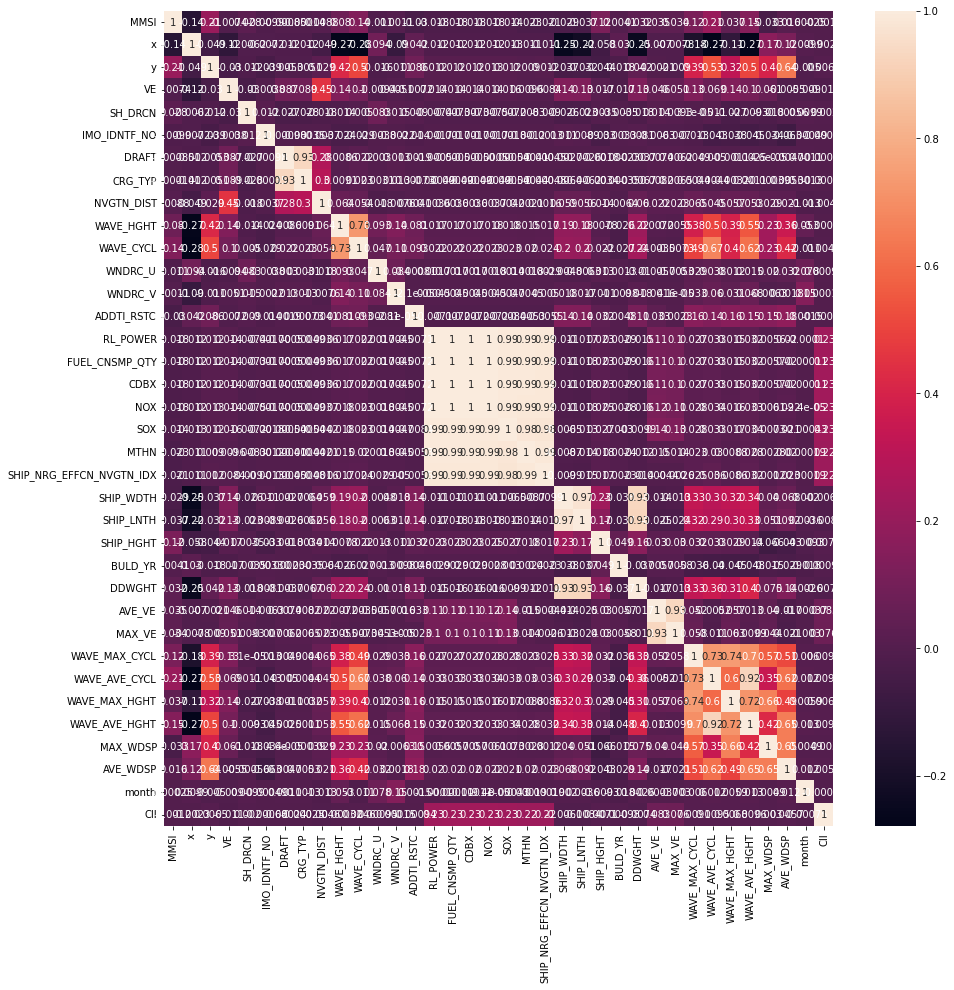

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df1.corr(), annot = True)

plt.savefig("corr.png")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

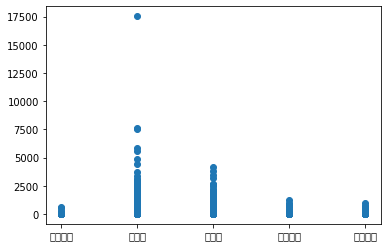

In [ ]:
plt.scatter(df1['cluster'],df1[['CII']])

In [ ]:
group=df1.groupby('cluster')
group.size()

cluster
남대서양    198631
북대서양    434851
인도양     390261
태평양     745629
필리핀해      7394
dtype: int64

In [ ]:
group.mean()

,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,WAVE_HGHT,WAVE_CYCL,WNDRC_U,WNDRC_V,ADDTI_RSTC,RL_POWER,FUEL_CNSMP_QTY,CDBX,NOX,SOX,MTHN,SHIP_NRG_EFFCN_NVGTN_IDX,SHIP_WDTH,SHIP_LNTH,SHIP_HGHT,BULD_YR,DDWGHT,AVE_VE,MAX_VE,WAVE_MAX_CYCL,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,month,CII
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
남대서양,3.350907e+08,-11.874163,-12.771176,6.961707,176.086799,1.369510e+07,0.023971,0.231530,92400.798272,1.032686,6.603161,0.265072,1.579890,2.684733e+08,2.730798e+11,2.759692e+11,8.593677e+05,6.412659e+07,6.303617e+05,5.576115e+05,31.674405,42.771911,240.812303,10.861902,1991.197819,136646.656141,12.932214,28.942981,16.496277,5.715188,4.048882,0.868189,14.132787,3.410120,4.038740,0.034947
북대서양,2.911108e+08,44.412670,13.229179,5.235338,173.873336,1.179671e+07,0.000847,0.009348,69071.132115,0.400963,2.222537,0.617264,-0.366002,3.945550e+08,1.420497e+11,1.465820e+11,4.564575e+05,4.724558e+07,2.554008e+05,1.154144e+05,35.459289,33.584026,197.757562,8.675187,2003.169138,69772.194467,12.864759,28.663715,13.976980,2.808842,3.538236,0.458568,17.570514,4.554945,4.090399,0.069886
인도양,3.645382e+08,15.293782,61.469960,7.274294,183.304858,1.056286e+07,0.000629,0.006316,92344.396985,1.274518,9.783476,0.884671,-0.131766,3.535282e+08,7.493691e+12,7.567842e+12,2.356630e+07,2.363230e+09,7.567204e+06,2.949178e+07,5191.047731,41.897724,238.370497,11.409121,1992.233446,138140.561673,13.330700,28.570047,19.702029,7.849688,4.610561,1.050361,16.613552,4.961268,4.124937,0.630515
태평양,3.687845e+08,19.719403,28.967989,5.811314,170.987495,1.242922e+07,0.000193,0.002922,87031.224562,0.537483,3.391769,-0.256420,0.003524,2.836294e+08,1.626289e+12,1.683035e+12,5.240985e+06,5.305698e+08,1.915265e+06,2.030739e+06,214.682522,36.048373,206.078231,9.949075,1999.854355,91253.972374,16.183518,40.032914,14.335982,4.300238,3.727260,0.668884,14.119819,3.300491,4.066300,0.362211
필리핀해,3.798428e+08,15.556820,120.180058,9.365387,106.173249,9.537117e+06,0.000000,0.000000,323541.862488,1.407633,7.202659,-2.427220,-1.385522,4.079383e+08,1.781630e+12,1.838506e+12,5.725111e+06,5.617959e+08,1.888150e+06,3.069015e+06,274.765588,42.088676,235.142286,11.063930,1997.089938,139375.775899,14.868862,34.585232,19.402632,6.930809,4.998554,1.051024,17.219426,4.892618,4.097511,0.712627


In [ ]:
group

In [ ]:
wave = df1.groupby('cluster')['WAVE_HGHT'].mean()

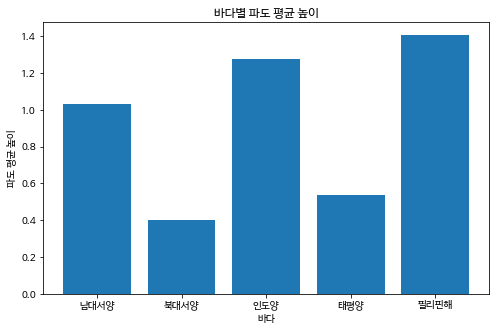

In [ ]:
plt.figure(figsize = (8,5))
plt.bar(wave.index, wave)
plt.title('바다별 파도 평균 높이')
plt.xlabel('바다')
plt.ylabel('파도 평균 높이')

plt.show()


In [ ]:
wave1 = df1.groupby('cluster')['CII'].mean()

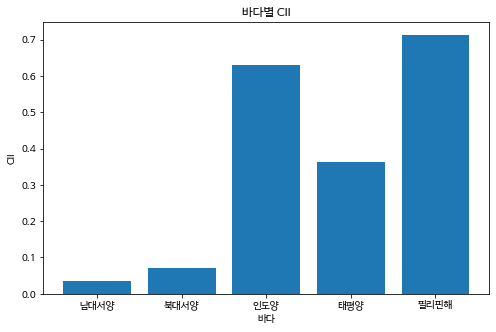

In [ ]:
plt.figure(figsize = (8,5))
plt.bar(wave1.index, wave1)
plt.title('바다별 CII')
plt.xlabel('바다')
plt.ylabel('CII')

plt.show()

In [ ]:
wave11 = df1.groupby('SHIP_KIND')['CII'].mean()


In [ ]:
wave11

SHIP_KIND
Asphalt or Bitumen Tanker         0.114378
Bunkering Tanker                  0.000465
Chemical Tanker                   0.025537
Crude Oil Tanker                  0.149918
Floating Storage or Production    0.000008
General Cargo                     0.019630
Inland Tanker                     0.055008
LPG Tanker                        0.000184
OIL PRODUCTS TANKER               0.000792
Oil Products Tanker               0.269464
Oil or Chemical Tanker            0.663257
Shuttle Tanker                    0.081486
Tanker                            0.000674
Utility Vessel                    0.000061
Name: CII, dtype: float64

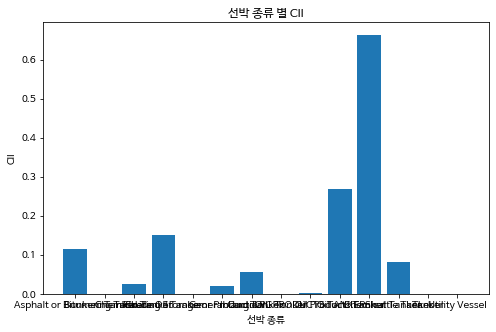

In [ ]:
plt.figure(figsize = (8,5))
plt.bar(wave11.index, wave11)
plt.title('선박 종류 별 CII')
plt.xlabel('선박 종류')
plt.rotate('90%')
plt.ylabel('CII')

plt.show()

In [ ]:
wave111 = df1.groupby('cluster')['NVGTN_DIST'].mean()

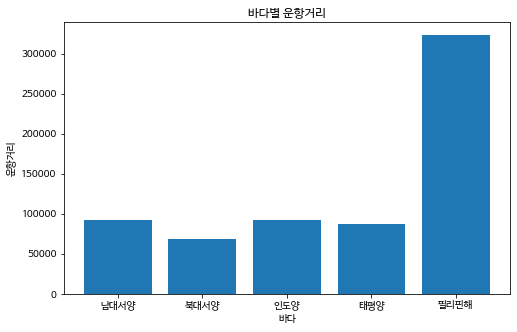

In [ ]:
plt.figure(figsize = (8,5))
plt.bar(wave111.index, wave111)
plt.title('바다별 운항거리')
plt.xlabel('바다')
plt.ylabel('운항거리')

plt.show()

In [ ]:
wave1111 = df1.groupby('cluster')['VE'].mean()

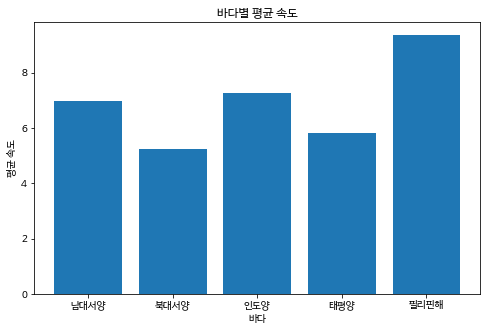

In [ ]:
plt.figure(figsize = (8,5))
plt.bar(wave1111.index, wave1111)
plt.title('바다별 평균 속도')
plt.xlabel('바다')
plt.ylabel('평균 속도')

plt.show()

In [ ]:
wave112 = df1.groupby('cluster')['CDBX'].mean()

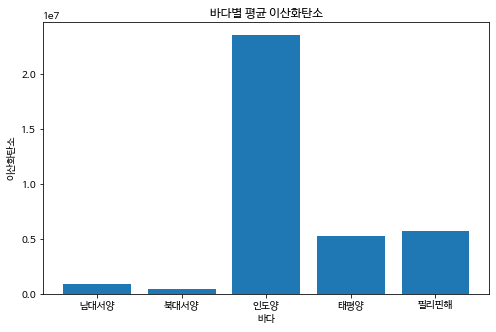

In [ ]:
plt.figure(figsize = (8,5))
plt.bar(wave112.index, wave112)
plt.title('바다별 평균 이산화탄소')
plt.xlabel('바다')
plt.ylabel('이산화탄소')

plt.show()

In [ ]:
wave1121 = df1.groupby('cluster')['NOX'].mean()

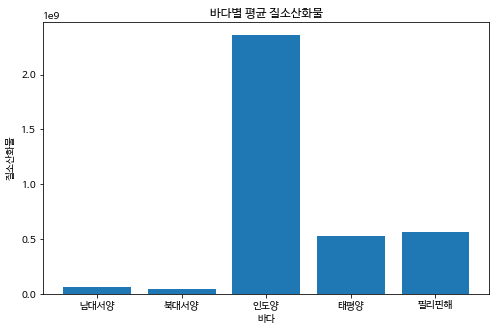

In [ ]:
plt.figure(figsize = (8,5))
plt.bar(wave1121.index, wave1121)
plt.title('바다별 평균 질소산화물')
plt.xlabel('바다')
plt.ylabel('질소산화물')

plt.show()

In [ ]:
wave11211 = df1.groupby('cluster')['MTHN'].mean()

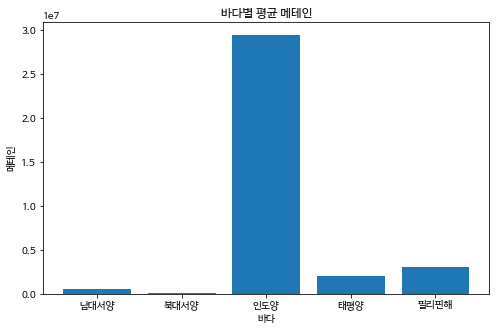

In [ ]:
plt.figure(figsize = (8,5))
plt.bar(wave11211.index, wave11211)
plt.title('바다별 평균 메테인')
plt.xlabel('바다')
plt.ylabel('메테인')

plt.show()